# MRVC VS H264

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --

## MRVC

In [ ]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

In [3]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MRVC.txt

In [4]:
!cat /tmp/MRVC.txt

0.49837086139169473	125.21478861970397
0.3503498526936027	192.87252286318036
0.22483778759820428	315.2529069996844
0.139521955667789	488.6327482726571
0.08333245650953984	711.0054797102978
0.05558536756453423	933.1324492757436
0.040959069865319865	1137.8850892825828


In [5]:
RD_MRVC = []
with open("/tmp/MRVC.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MRVC.append((float(rate), float(_distortion)))

## MP4

In [21]:
!sed -z -i 's!\nimport image_IPP as codec!\n#import image_IPP as codec!g' RD_curve.py
!sed -z -i 's!\nimport image_IPP_adaptive as codec\n!\n#import image_IPP_adaptive as codec\n!g' RD_curve.py
!sed -z -i 's!\nimport IPP_compressor as codec\n!\n#import IPP_compressor as codec\n!g' RD_curve.py
!sed -z -i 's!\n#import MP4 as codec\n!\nimport MP4 as codec\n!g' RD_curve.py
!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [22]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [23]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

frame=   30 fps=0.0 q=-1.0 Lsize=     120kB time=00:00:01.16 bitrate= 849.9kbits/s speed=5.32x    
video:119kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.788368%
[libx264 @ 0x55c010738040] frame I:1     Avg QP:28.98  size: 15399
[libx264 @ 0x55c010738040] frame P:29    Avg QP:29.19  size:  3664
[libx264 @ 0x55c010738040] mb I  I16..4:  1.3% 64.1% 34.6%
[libx264 @ 0x55c010738040] mb P  I16..4:  0.2%  0.4%  0.5%  P16..4: 39.0% 30.4% 19.6%  0.0%  0.0%    skip:10.0%
[libx264 @ 0x55c010738040] 8x8 transform intra:57.8% inter:52.7%
[libx264 @ 0x55c010738040] coded y,u,v intra: 90.7% 40.1% 27.2% inter: 39.6% 4.4% 2.7%
[libx264 @ 0x55c010738040] i16 v,h,dc,p: 17% 78%  0%  4%
[libx264 @ 0x55c010738040] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 21% 19% 20%  4%  6%  6%  6%  7% 11%
[libx264 @ 0x55c010738040] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 29% 32% 11%  4%  5%  5%  5%  5%  5%
[libx264 @ 0x55c010738040] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55c010738040] ref P L0: 66

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=13.1x    
video:6330kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --e

[libx264 @ 0x55ca2a1a1040] using SAR=128/117
[libx264 @ 0x55ca2a1a1040] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55ca2a1a1040] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55ca2a1a1040] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=33.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv4

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=14.4x    
video:5544kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

In [24]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [25]:
!cat /tmp/MP4.txt

0.1676373106060606	30.738501551978118
0.10806151795735129	47.725119028829944
0.07132873877665544	73.63353763327721
0.04731867283950617	113.35061147499297
0.032039141414141416	175.44779128086418
0.02240547839506173	259.651842645202
0.01577493686868687	380.47030066287886


In [26]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

## Comparison

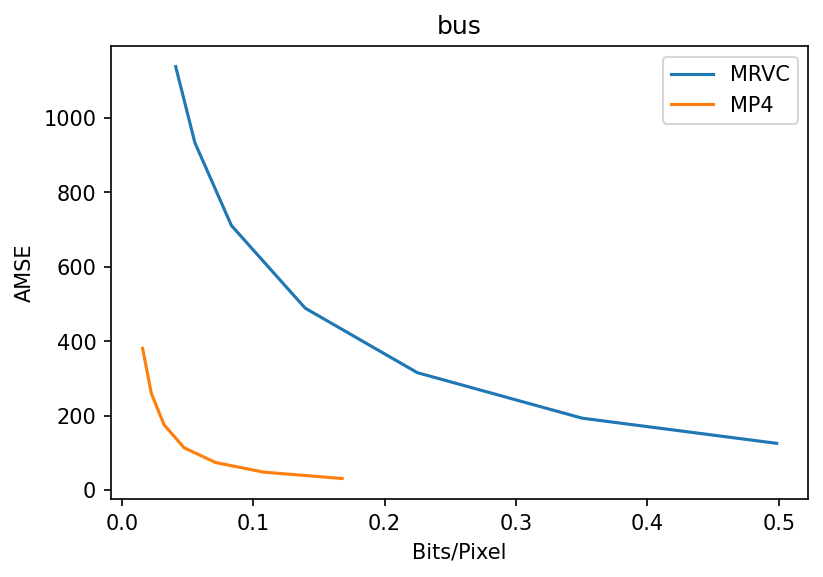

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_MRVC), label="MRVC")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()